# GRIP @ The Sparks Foundation

# Author- Kajal Kourani ( Data Science & Business Analytics Intern )
# Task 1 : Prediction using Supervised Machine Learning

### ( Level - Beginner )
## Problem Statement

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# Reading The Data For Further Analysis

In [3]:
# Setting working directory
os.chdir(R'C:\Users\Kajal\GRIPS-SPARKS-FOUNDATION-INTERNSHIP-JULY-2022-BATCH\Task 1')

# Loading the CSV data into a DataFrame
hs=pd.read_csv('hours_scores.csv')
print("Data is imported successfully")

Data is imported successfully


# Exploratory Data Analysis

In [4]:
hs.head()# head of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
hs.shape#Checking the data dimensions

(25, 2)

The data has 25 rows and 2 columns

In [6]:
# Viewing the columns of the data
hs.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# Checking the column information
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# Checking for missing values if any
hs.isnull().sum().sort_values(ascending=False)

Hours     0
Scores    0
dtype: int64

In [9]:
# Summary of all numerical data
hs.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


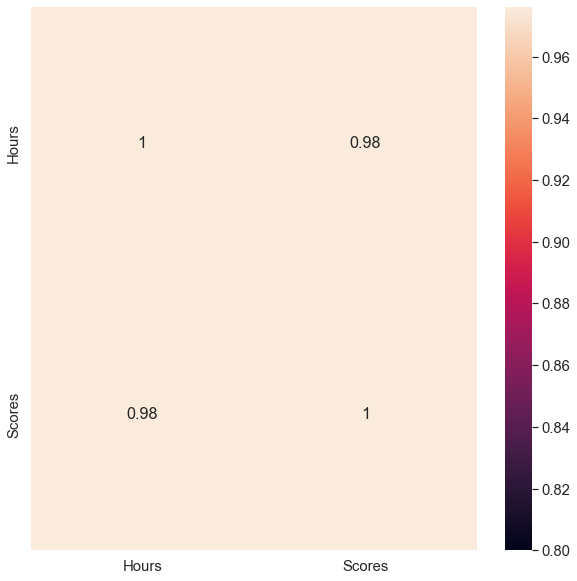

In [10]:
# Showing correlation between the variables
dataset=hs.iloc[:,[0,1]]
Cor_s=dataset.corr()
display(Cor_s)
# Plotting the correlation matrix using heatmap
sns.set(font_scale=1.35)
f, ax = plt.subplots(figsize=(10,10))
hm=sns.heatmap(Cor_s, annot = True,vmax=.8)

Text(0.5, 0, 'Scores')

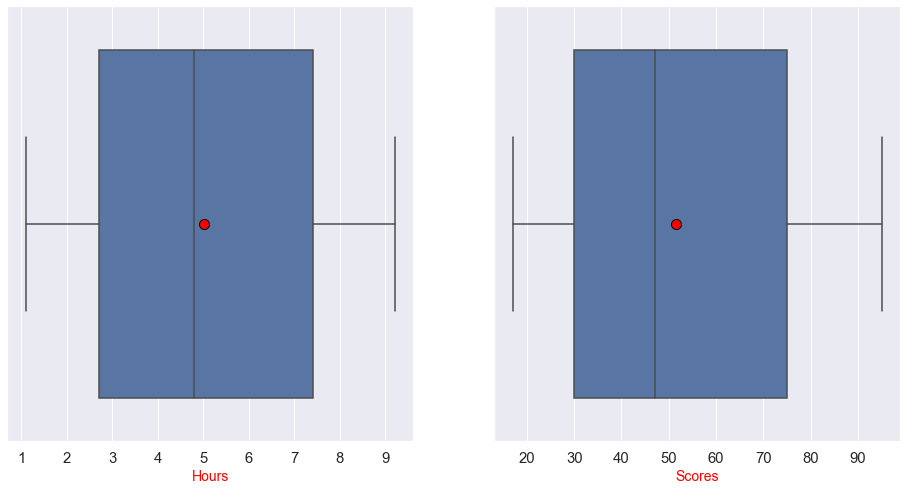

In [11]:
# plot graphs for numerical columns to check data distribution 

plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.boxplot(hs['Hours'],showmeans=True,meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Hours', fontdict={'color':'red','fontsize':14})

plt.subplot(1,2,2)
sns.boxplot(hs['Scores'],showmeans=True,meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Scores', fontdict={'color':'red','fontsize':14})

Observation:There is no missing or null value and outliers are also not present.Hence we don't need to do data preprocessing

# Data Visualization

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN SCORES AND HOURS')

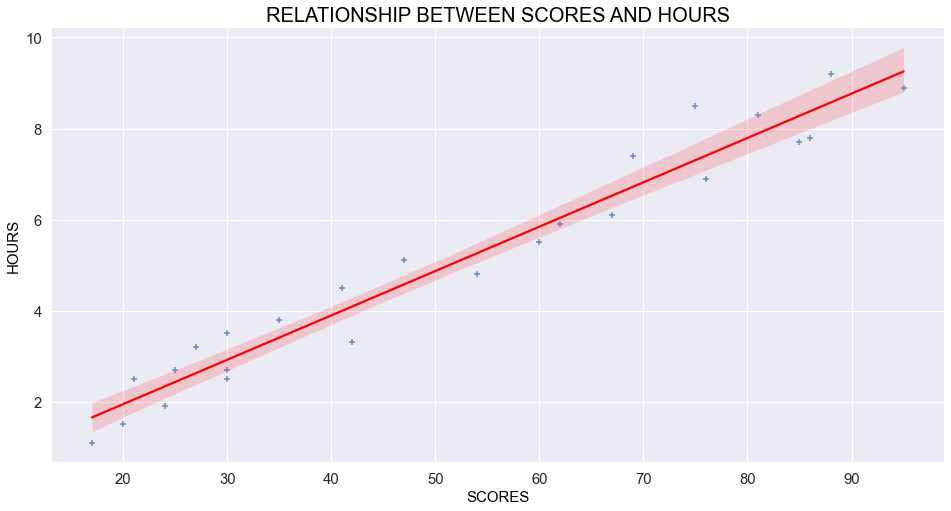

In [12]:
plt.figure(figsize=[16,8])
sns.regplot(x=hs['Scores'],y=hs['Hours'],line_kws={"color": "red"},marker='+')
plt.xlabel("SCORES",fontdict={'color':'black','fontsize':15})
plt.ylabel("HOURS",fontdict={'color':'black','fontsize':15})
plt.title("RELATIONSHIP BETWEEN SCORES AND HOURS",fontdict={'color':'black','fontsize':20})

Observation : From the above scatterplot we can safely assume a positive linear relation between the number of hours studied and percentage of score

# Preparing The Data For Modelling

In [13]:
# Creating Dependent And Independent data set
Y= hs.iloc[:,1] # Dependent Data
X= hs.iloc[:,0] #Independent Data

Text(0.5, 0, 'Scores')

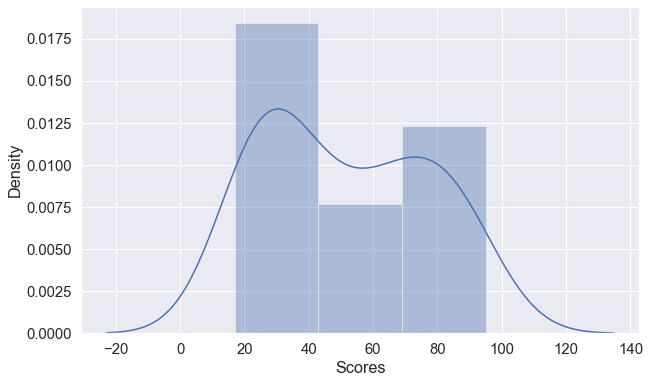

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(Y)
plt.xlabel('Scores')

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

We are spliting the data on percentage basis i.e 80% of the data will go to train data and 20% of the data will go to test data.

# Building The Model

In [16]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
X_train = np.array([X_train])
X_train=X_train.reshape(-1,1)
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


In [17]:
# Predicting the Test set result
X_test = np.array([X_test])
X_test=X_test.reshape(-1,1)
y_pred = regressor.predict(X_test)
y_pred_data=pd.DataFrame(y_pred)

In [18]:
regressor.score(X_train,Y_train)

0.9515510725211552

In [19]:
regressor.score(X_test,Y_test)

0.9454906892105355

In [20]:
regressor.coef_

array([9.91065648])

# Task 

What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
hours = 9.25
hours = np.array([hours])
hours = hours.reshape(-1, 1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


# Model Statistics

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [23]:
#Adding Intercept term to the model
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [24]:
#Converting into Dataframe
X_train_d=pd.DataFrame(X_train)

In [25]:
#Printing the Model Statistics
model=sm.OLS(Y_train,X_train).fit() 
y_pred=model.predict(X_test) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           2.79e-13
Time:                        17:46:04   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
Hours          9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Checking the VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train.values, j) for j in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

   VIF Factor features
0    5.444128    const
1    1.000000    Hours


In [27]:
model.params # Extracting the coefficients

const    2.018160
Hours    9.910656
dtype: float64

In [28]:
#Comparing Actual value with Predicted value
result = pd.DataFrame({'Actual values':Y_test,'Predicted values':y_pred})
result

,Actual values,Predicted values
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


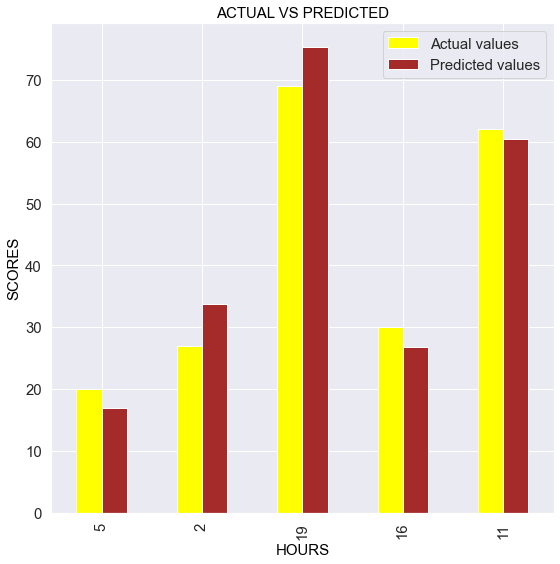

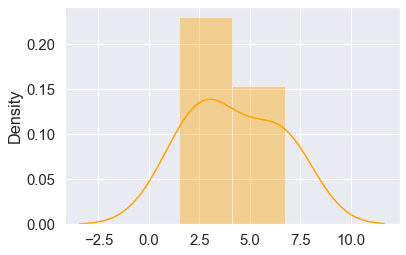

In [29]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

result.plot.bar(color=['Yellow','Brown'],figsize=(9,9))
plt.xlabel("HOURS",fontdict={'color':'black','fontsize':15})
plt.ylabel("SCORES",fontdict={'color':'black','fontsize':15})
plt.title("ACTUAL VS PREDICTED",fontdict={'color':'black','fontsize':15})
plt.show()

diff = np.array(np.abs(Y_test-y_pred))
diff

#Displot distribution of Actual value with Predicted value
sns.distplot(diff,color='orange')
plt.show()

# Model Evaluation

### Mean Absolute Error(MAE) :MAE measures the differences between prediction and actual observation.

In [30]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.183859899002985


### MSE simply refers to the mean of the squared difference between the predicted value and the observed value. 

In [31]:
from sklearn import metrics  
print('Mean Squared Error:', 
      metrics.mean_squared_error(Y_test, y_pred))

Mean Squared Error: 21.59876930721739


### R-squared is measure of how close the data are to the fitted regression line. 

In [32]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.9454906892105356

### The mean absolute percentage error (MAPE) is a measure of how accurate a forecast system is.The mean absolute percentage error (MAPE) is the mean or average of the absolute percentage errors of forecasts. 

In [33]:
def MAPE(actual,pred):
    actual,pred=np.array(actual),np.array(pred)
    mape=np.mean(np.abs((actual-pred)/actual))*100
    return mape

m=MAPE(Y_test,y_pred)
print(m)

12.568891617045704


### Conclusion

### 1. We have successfully created a Simple linear Regression model to predict score of the student given number of hours one studies.
### 2. By the MAE and MSE , we are not getting much difference in actual or predicted value , means error is less.
### 3.The Score of R-Square 0.94 quite close to 1.
### 4. My model also achieved lower MAPE.The lower the MAPE better is the model.

# Task 1 Completed Successfully
# Thank You